## Monthly Decomposition of overturning

SF and MX decompositions for 10 years of data (output096-105)
- total
- mean total
- seasonal climatology, smoothed by 2 months filter
- 2 month filter for 10 years


**Full computation steps shown here, some performed in PBS scripts**

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [2]:
client = Client(n_workers=8)
client

<Client: 'tcp://127.0.0.1:39289' processes=8 threads=16, memory=250.00 GiB>

In [3]:
# files:
base = '/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/';
xch = 1440#2*288
ych = 1080#2*216

fgrd   = xr.open_dataset(base + 'output096/ocean/ocean_grid.nc').chunk({'yt_ocean':ych,'yu_ocean':ych,'xt_ocean':xch,'xu_ocean':xch})
fwmass_mean = xr.open_mfdataset('/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/output096-105_mean/ocean_wmass_mean_v2test.nc').chunk({'grid_yt_ocean':ych,'grid_yu_ocean':ych,'grid_xt_ocean':xch})
fmonth_mean = xr.open_mfdataset('/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/output096-105_mean/ocean_month_mean.nc').chunk({'yt_ocean':ych,'yu_ocean':ych,'xt_ocean':xch})
fheat_mean = xr.open_mfdataset('/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/output096-105_mean/ocean_heat_mean.nc').chunk({'yt_ocean':ych,'xt_ocean':xch})

# load RYF sc data
base_msc = '/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/output096-105_mean/'
# ---------------------------------------------------------------------------------- #
# load in data set ----------------------------------------------------------------- #
fmonth_sc = xr.open_mfdataset(base_msc+'ocean_month.ncea.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})
fheat_sc = xr.open_mfdataset(base_msc+'ocean_heat.ncea.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})
fwmass_sc = xr.open_mfdataset(base_msc+'ocean_wmass.ncea.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})
fwmass_mix_sc = xr.open_mfdataset(base_msc+'ocean_wmass_diff_cbt.ncea.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})

In [5]:
%%time
#### load output of monthly data for 8 years (RYF) #### output 086-094
base_msc = '/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/'
# ---------------------------------------------------------------------------------- #
nr_outputs = 10    # define number of output files to consider
last_output = 105  # the last output to consider loading in
# ---------------------------------------------------------------------------------- #
a = [i for i in range(last_output+1-nr_outputs,last_output+1)] # create integer list
s = list(range(0,nr_outputs))
c = [] # empty list which I fill up
d = []
e = []
for i in s: # loop through the number of files I would like
    #c.append(i)
    d.append(i)
    e.append(i)
    # fill in empty list with integers trailing two zeros (000, 001, 002, ...)
    #c[i] = base_msc+'output'+str(a[i]).zfill(3) + '/ocean/ocean_wmass.nc' 
    d[i] = base_msc+'output'+str(a[i]).zfill(3) + '/ocean/ocean_heat.nc' 
    e[i] = base_msc+'output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 

# load in data set ----------------------------------------------------------------- #
#fwmass_m = xr.open_mfdataset(c,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_yu_ocean':ych/10,'grid_xt_ocean':xch/10})
fheat_m = xr.open_mfdataset(d,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/20,'xt_ocean':xch/20})
fmonth_m = xr.open_mfdataset(e,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/20,'yu_ocean':ych/20,'xt_ocean':xch/20})


CPU times: user 14.1 s, sys: 654 ms, total: 14.7 s
Wall time: 17.1 s


In [4]:
%%time
#### load output of monthly data for 8 years (RYF) #### output 086-094
base_msc = '/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/'
# ---------------------------------------------------------------------------------- #
nr_outputs = 1    # define number of output files to consider
last_output = 105  # the last output to consider loading in
# ---------------------------------------------------------------------------------- #
a = [i for i in range(last_output+1-nr_outputs,last_output+1)] # create integer list
s = list(range(0,nr_outputs))
c = [] # empty list which I fill up
d = []
e = []
for i in s: # loop through the number of files I would like
    c.append(i)

    # fill in empty list with integers trailing two zeros (000, 001, 002, ...)
    c[i] = base_msc+'output'+str(a[i]).zfill(3) + '/ocean/ocean_wmass.nc' 

# load in data set ----------------------------------------------------------------- #
fwmass_m1 = xr.open_mfdataset(c,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/20,'grid_yu_ocean':ych/20,'grid_xt_ocean':xch/20})
#fheat_m = xr.open_mfdataset(d,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})
#fmonth_m = xr.open_mfdataset(e,combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'yu_ocean':ych/10,'xt_ocean':xch/10})


CPU times: user 1.06 s, sys: 69 ms, total: 1.13 s
Wall time: 1.26 s


In [6]:
# ---------------------------------------------------------------------------------- #

# Generate xgcm grid object:
gridwm = Grid(fwmass_m1,coords={"x":{"center":"grid_xt_ocean"},
                             "y":{"center":"grid_yt_ocean","right":"grid_yu_ocean"},
                             "T":{"center":"neutral","outer":"neutralrho_edges"}},periodic=False)
gridmn = Grid(fmonth_m,coords={"x":{"center":"xt_ocean"},
                             "y":{"center":"yt_ocean","right":"yu_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)
gridht = Grid(fheat_m,coords={"x":{"center":"xt_ocean"},
                             "y":{"center":"yt_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)
# gridd = Grid(fdaily,coords={"x":{"center":"xt_ocean"},
#                              "y":{"center":"yt_ocean","right":"yu_ocean"},
#                              "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)

# ---------------------------------------------------------------------------------- #

# Some constants:
Cp = 3992.10322329649
rho0 = 1035
dT = (fwmass_m1.neutral[1]-fwmass_m1.neutral[0]).values

sc_daylength = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

area = fgrd.area_t.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
dy = gridmn.diff(fgrd.yu_ocean,'y',boundary='extend').rename({'yt_ocean':'grid_yt_ocean'})

Define some functions

In [7]:
def running_av_2mos(variable):
    month_length = variable.time.dt.days_in_month
    running_mean = (variable*month_length).roll(time = 1, roll_coords = False)+ (variable*month_length)#.roll(time = -1, roll_coords = False)+2*(variable*month_length)
    time_length = (month_length).roll(time = 1, roll_coords = False)+ (month_length)#.roll(time = -1, roll_coords = False)+2*(month_length)
    running_mean = running_mean/time_length
    return running_mean


In [50]:
def running_av_2mos_mo(variable):
    month_length = variable.time.dt.days_in_month
    time_length = (month_length).roll(time = 1, roll_coords = False)+ (month_length)#.roll(time = -1, roll_coords = False)+2*(month_length)
    time_length = time_length/2
    return time_length


In [51]:
def running_av_10days(variable):
    running_mean = (variable).roll(time = 1, roll_coords = False)+ (variable) + (variable).roll(time = 2, roll_coords = False)+ (variable).roll(time = 3, roll_coords = False)+(variable).roll(time = 4, roll_coords = False)+(variable).roll(time = 5, roll_coords = False)+(variable).roll(time = 6, roll_coords = False)+(variable).roll(time = 7, roll_coords = False)+(variable).roll(time = 8, roll_coords = False)+(variable).roll(time = 9, roll_coords = False)#.roll(time = -1, roll_coords = False)+2*(variable*month_length)
    running_mean = running_mean/10
    return running_mean


In [52]:
def weighted_time_mean_2mo_filter(variable):
    month_length = running_av_2mos_mo(variable.time.dt.days_in_month)
    time_mean = (variable*month_length).sum('time')/(month_length.sum('time'))
    return time_mean

In [11]:
def weighted_time_mean_2mo_filter_mo(variable, variable1):
    month_length = running_av_2mos_mo(variable1.time.dt.days_in_month).groupby('time.month').mean('time')
    time_mean = (variable*month_length).sum('month')/(month_length.sum('month'))
    return time_mean

In [125]:
def weighted_time_mean2(variable):
    month_length = variable.time.dt.days_in_month
    time_mean = (variable*month_length).sum('time')/(month_length.sum('time'))
    return time_mean

### COMPUTATION OF TIME MEANS


ncra doesn't do time weighting within files. So need to time mean ncea (climatology) files.

Here I calculate them manually using my weighted time mean function, and save them out.

In [176]:
%%time
## correct time means of ocean_wmass.nc

# weighted time average
mean_ty_trans_nrho = weighted_time_mean2(fwmass_sc.ty_trans_nrho)
mean_temp_vdiffuse_sbc_on_nrho = weighted_time_mean2(fwmass_sc.temp_vdiffuse_sbc_on_nrho)
mean_sfc_hflux_pme_on_nrho = weighted_time_mean2(fwmass_sc.sfc_hflux_pme_on_nrho)
mean_frazil_on_nrho = weighted_time_mean2(fwmass_sc.frazil_on_nrho)
mean_sw_heat_on_nrho = weighted_time_mean2(fwmass_sc.sw_heat_on_nrho)
mean_temp_vdiffuse_diff_cbt_on_nrho = weighted_time_mean2(fwmass_sc.temp_vdiffuse_diff_cbt_on_nrho)
mean_temp_nonlocal_KPP_on_nrho = weighted_time_mean2(fwmass_sc.temp_nonlocal_KPP_on_nrho)

mean_temp_vdiffuse_diff_cbt_kppish_on_nrho = weighted_time_mean2(fwmass_mix_sc.temp_vdiffuse_diff_cbt_kppish_on_nrho)
mean_temp_vdiffuse_diff_cbt_kppicon_on_nrho = weighted_time_mean2(fwmass_mix_sc.temp_vdiffuse_diff_cbt_kppicon_on_nrho)
mean_vdiffuse_diff_cbt_kppbl_on_nrho = weighted_time_mean2(fwmass_mix_sc.temp_vdiffuse_diff_cbt_kppbl_on_nrho)
mean_temp_vdiffuse_diff_cbt_wave_on_nrho = weighted_time_mean2(fwmass_mix_sc.temp_vdiffuse_diff_cbt_wave_on_nrho)
mean_temp_vdiffuse_diff_cbt_kppdd_on_nrho = weighted_time_mean2(fwmass_mix_sc.temp_vdiffuse_diff_cbt_kppdd_on_nrho)

# load
mean_ty_trans_nrho.load()
mean_temp_vdiffuse_sbc_on_nrho.load()
mean_sfc_hflux_pme_on_nrho.load()
mean_frazil_on_nrho.load()
mean_sw_heat_on_nrho.load()
mean_temp_vdiffuse_diff_cbt_on_nrho.load()
mean_temp_nonlocal_KPP_on_nrho.load()
mean_sw_heat_on_nrho.load()
mean_temp_vdiffuse_diff_cbt_kppish_on_nrho.load()
mean_temp_vdiffuse_diff_cbt_kppicon_on_nrho.load()
mean_vdiffuse_diff_cbt_kppbl_on_nrho.load()
mean_temp_vdiffuse_diff_cbt_wave_on_nrho.load()
mean_temp_vdiffuse_diff_cbt_kppdd_on_nrho.load()

CPU times: user 1min 15s, sys: 13.1 s, total: 1min 28s
Wall time: 3min 3s


<xarray.DataArray (neutral: 74, grid_yt_ocean: 1080, grid_xt_ocean: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * grid_xt_ocean  (grid_xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * neutral        (neutral) float64 -2.75 -2.25 -1.75 ... 32.75 33.25 33.75
  * grid_yt_ocean  (grid_yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95

In [177]:
# save to ncfile
ds = xr.Dataset({'ty_trans_nrho': mean_ty_trans_nrho, 'temp_vdiffuse_sbc_on_nrho': mean_temp_vdiffuse_sbc_on_nrho, 
                 'sfc_hflux_pme_on_nrho':mean_sfc_hflux_pme_on_nrho, 'frazil_on_nrho':mean_frazil_on_nrho,
                 'sw_heat_on_nrho':mean_sw_heat_on_nrho,'temp_vdiffuse_diff_cbt_on_nrho':mean_temp_vdiffuse_diff_cbt_on_nrho,
                 'temp_nonlocal_KPP_on_nrho':mean_temp_nonlocal_KPP_on_nrho,'temp_vdiffuse_diff_cbt_kppdd_on_nrho':mean_temp_vdiffuse_diff_cbt_kppdd_on_nrho,
                 'sw_heat_on_nrho':mean_sw_heat_on_nrho,'temp_vdiffuse_diff_cbt_kppish_on_nrho':mean_temp_vdiffuse_diff_cbt_kppish_on_nrho,
                 'temp_vdiffuse_diff_cbt_kppicon_on_nrho':mean_temp_vdiffuse_diff_cbt_kppicon_on_nrho,'temp_vdiffuse_diff_cbt_kppbl_on_nrho':mean_vdiffuse_diff_cbt_kppbl_on_nrho,
                 'temp_vdiffuse_diff_cbt_wave_on_nrho':mean_temp_vdiffuse_diff_cbt_wave_on_nrho})
                 
ds.to_netcdf('/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/output096-105_mean/ocean_wmass_mean_v2test.nc', 
         encoding={'ty_trans_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_sbc_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'sfc_hflux_pme_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'frazil_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_nonlocal_KPP_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'frazil_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'sw_heat_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppish_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppicon_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppbl_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppdd_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_wave_on_nrho': {'shuffle': True, 'zlib': True, 'complevel': 5}})

In [16]:
# %%time
# ## correct time means of ocean_heat.nc

# # weighted time average
# mean_temp_vdiffuse_sbc = weighted_time_mean(fheat_sc.temp_vdiffuse_sbc,days_in_month_sc)
# mean_sfc_hflux_pme = weighted_time_mean(fheat_sc.sfc_hflux_pme,days_in_month_sc)
# mean_frazil_3d = weighted_time_mean(fheat_sc.frazil_3d,days_in_month_sc)
# mean_sw_heat = weighted_time_mean(fheat_sc.sw_heat,days_in_month_sc)
# mean_temp_vdiffuse_diff_cbt = weighted_time_mean(fheat_sc.temp_vdiffuse_diff_cbt,days_in_month_sc)
# mean_temp_nonlocal_KPP = weighted_time_mean(fheat_sc.temp_nonlocal_KPP,days_in_month_sc)

# mean_temp_vdiffuse_diff_cbt_kppish = weighted_time_mean(fheat_sc.temp_vdiffuse_diff_cbt_kppish,days_in_month_sc)
# mean_temp_vdiffuse_diff_cbt_kppicon = weighted_time_mean(fheat_sc.temp_vdiffuse_diff_cbt_kppicon,days_in_month_sc)
# mean_vdiffuse_diff_cbt_kppbl = weighted_time_mean(fheat_sc.temp_vdiffuse_diff_cbt_kppbl,days_in_month_sc)
# mean_temp_vdiffuse_diff_cbt_wave = weighted_time_mean(fheat_sc.temp_vdiffuse_diff_cbt_wave,days_in_month_sc)
# mean_temp_vdiffuse_diff_cbt_kppdd = weighted_time_mean(fheat_sc.temp_vdiffuse_diff_cbt_kppdd,days_in_month_sc)

# # load
# mean_temp_vdiffuse_sbc.load()
# mean_sfc_hflux_pme.load()
# mean_frazil_3d.load()
# mean_sw_heat.load()
# mean_temp_vdiffuse_diff_cbt.load()
# mean_temp_nonlocal_KPP.load()
# mean_temp_vdiffuse_diff_cbt_kppish.load()
# mean_temp_vdiffuse_diff_cbt_kppicon.load()
# mean_vdiffuse_diff_cbt_kppbl.load()
# mean_temp_vdiffuse_diff_cbt_wave.load()
# mean_temp_vdiffuse_diff_cbt_kppdd.load()

# # save to ncfile
# ds = xr.Dataset({'temp_vdiffuse_sbc': mean_temp_vdiffuse_sbc, 
#                  'sfc_hflux_pme':mean_sfc_hflux_pme, 'frazil_3d':mean_frazil_3d,
#                  'sw_heat':mean_sw_heat,'temp_vdiffuse_diff_cbt':mean_temp_vdiffuse_diff_cbt,
#                  'temp_nonlocal_KPP':mean_temp_nonlocal_KPP,'temp_vdiffuse_diff_cbt_kppdd':mean_temp_vdiffuse_diff_cbt_kppdd,
#                  'temp_vdiffuse_diff_cbt_kppish':mean_temp_vdiffuse_diff_cbt_kppish,
#                  'temp_vdiffuse_diff_cbt_kppicon':mean_temp_vdiffuse_diff_cbt_kppicon,'temp_vdiffuse_diff_cbt_kppbl':mean_vdiffuse_diff_cbt_kppbl,
#                  'temp_vdiffuse_diff_cbt_wave':mean_temp_vdiffuse_diff_cbt_wave})
                 
# ds.to_netcdf('/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/output096-105_mean/ocean_heat_mean.nc', 
#          encoding={'temp_vdiffuse_sbc': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'sfc_hflux_pme': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'frazil_3d': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_nonlocal_KPP': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'sw_heat': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt_kppish': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt_kppicon': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt_kppbl': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt_kppdd': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'temp_vdiffuse_diff_cbt_wave': {'shuffle': True, 'zlib': True, 'complevel': 5}})



CPU times: user 2min 18s, sys: 5.88 s, total: 2min 24s
Wall time: 3min 13s


In [17]:
# %%time
# ## correct time means of ocean_month.nc

# # weighted time average
# mean_temp = weighted_time_mean(fmonth_sc.temp,days_in_month_sc)
# mean_ty_trans = weighted_time_mean(fmonth_sc.ty_trans,days_in_month_sc)

# # load
# mean_temp.load()
# mean_ty_trans.load()

# # save to ncfile
# ds = xr.Dataset({'temp': mean_temp, 'ty_trans':mean_ty_trans, })
                 
# ds.to_netcdf('/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/output096-105_mean/ocean_month_mean.nc', 
#          encoding={'temp': {'shuffle': True, 'zlib': True, 'complevel': 5},
#                   'ty_trans': {'shuffle': True, 'zlib': True, 'complevel': 5}})



CPU times: user 30.9 s, sys: 1.57 s, total: 32.4 s
Wall time: 42.4 s


In [13]:
days_in_month_m = fheat_m.average_DT/3600/24/1e9
days_in_month_m

<xarray.DataArray 'average_DT' (time: 120)>
dask.array<truediv, shape=(120,), dtype=timedelta64[ns], chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2081-01-16 12:00:00 ... 2090-12-16 12:00:00

### Continue Here:

In [183]:
fwmass_m = fheat_m.copy()

In [184]:
# # Group SF and MX terms for monthly data:
# fwmass_m["SF_cv"] = fwmass_m.temp_vdiffuse_sbc_on_nrho + \
#                        fwmass_m.sfc_hflux_pme_on_nrho + \
#                        fwmass_m.frazil_on_nrho + \
#                        fwmass_m.sw_heat_on_nrho# + \
# #                       fwmass_m.temp_rivermix_on_nrho
# fwmass_m["MX_cv"] = fwmass_m.temp_vdiffuse_diff_cbt_on_nrho + \
#                        fwmass_m.temp_nonlocal_KPP_on_nrho 

obj, obj2 = xr.broadcast(fheat_m.sfc_hflux_pme,fheat_m.temp_vdiffuse_sbc)
sfc_hflux_pme_m = obj.where(fheat_m.st_ocean==fheat_m.st_ocean[0],other=0.)

fheat_m["SF_cv"] = fheat_m.temp_vdiffuse_sbc + \
                      sfc_hflux_pme_m + \
                      fheat_m.frazil_3d + \
                      fheat_m.sw_heat# + \
#                      fheat_m.temp_rivermix
fheat_m["MX_cv"] = fheat_m.temp_vdiffuse_diff_cbt + \
                      fheat_m.temp_nonlocal_KPP 
# Group SF and MX terms for sc data:

obj, obj2 = xr.broadcast(fheat_sc.sfc_hflux_pme,fheat_sc.temp_vdiffuse_sbc)
sfc_hflux_pme_sc = obj.where(fheat_sc.st_ocean==fheat_sc.st_ocean[0],other=0.)

fheat_sc["MX_cv"] = fheat_sc.temp_vdiffuse_diff_cbt + \
                      fheat_sc.temp_nonlocal_KPP 
fheat_sc["SF_cv"] = fheat_sc.temp_vdiffuse_sbc + \
                      fheat_sc.sw_heat + \
                      fheat_sc.frazil_3d + \
                      sfc_hflux_pme_sc 
#                      fheat_sc.temp_rivermix
fwmass_sc["MX_cv"] = fwmass_sc.temp_vdiffuse_diff_cbt_on_nrho + \
                      fwmass_sc.temp_nonlocal_KPP_on_nrho 
fwmass_sc["SF_cv"] = fwmass_sc.temp_vdiffuse_sbc_on_nrho + \
                      fwmass_sc.sw_heat_on_nrho + \
                      fwmass_sc.sfc_hflux_pme_on_nrho + \
                      fwmass_sc.frazil_on_nrho
# Group mean SF and MX terms:
fwmass_mean["SF_cv"] = fwmass_mean.temp_vdiffuse_sbc_on_nrho + \
                       fwmass_mean.sfc_hflux_pme_on_nrho + \
                       fwmass_mean.frazil_on_nrho + \
                       fwmass_mean.sw_heat_on_nrho #+ \
                       #fwmass_mean.temp_rivermix_on_nrho
fwmass_mean["MX_cv"] = fwmass_mean.temp_vdiffuse_diff_cbt_on_nrho + \
                       fwmass_mean.temp_nonlocal_KPP_on_nrho 

obj, obj2 = xr.broadcast(fheat_mean.sfc_hflux_pme,fheat_mean.temp_vdiffuse_sbc)
sfc_hflux_pme_mean = obj.where(fheat_mean.st_ocean==fheat_mean.st_ocean[0],other=0.)

fheat_mean["SF_cv"] = fheat_mean.temp_vdiffuse_sbc + \
                      sfc_hflux_pme_mean + \
                      fheat_mean.frazil_3d + \
                      fheat_mean.sw_heat # + \
#                      fheat_mean.temp_rivermix
fheat_mean["MX_cv"] = fheat_mean.temp_vdiffuse_diff_cbt + \
                      fheat_mean.temp_nonlocal_KPP


Calculate running 2 month means and save them in same DataSets for ease of use with xgcm.
Binning done with xhistogram to capture partial cells.

In [185]:
tbins = fwmass_m1.neutralrho_edges.values

In [186]:
# calculate a running mean of 2 months of ty_trans_nrho, temp and ty_trans and add them back into datasets
fmonth_m['temp_2mo'] = running_av_2mos(fmonth_m.temp)
fmonth_m['ty_trans_2mo'] = running_av_2mos(fmonth_m.ty_trans)

# temperature binning of 2 month running average of both temp and ty_trans:
temp_u_mean = gridmn.interp(fmonth_m.temp_2mo,'y',boundary='extend')-273.15
fwmass_m["ty_trans_nrho_mean_2mo"] = histogram(temp_u_mean, bins=[tbins], dim = ['st_ocean'],weights=fmonth_m.ty_trans_2mo).rename({temp_u_mean.name+'_bin':'neutral','xt_ocean':'grid_xt_ocean','yu_ocean':'grid_yu_ocean'})

# temperature binning of 10 year
temp_u_mean_tot = gridmn.interp(fmonth_mean.temp,'y',boundary='extend')-273.15
fwmass_mean["ty_trans_nrho_mean_1yr"] = histogram(temp_u_mean_tot, bins=[tbins], dim = ['st_ocean'],weights=fmonth_mean.ty_trans).rename({temp_u_mean_tot.name+'_bin':'neutral','xt_ocean':'grid_xt_ocean','yu_ocean':'grid_yu_ocean'})

# calculate a running mean of 2 months of seasonal climatology
fwmass_sc['ty_trans_nrho_2mo'] = running_av_2mos(fwmass_sc.ty_trans_nrho)
fmonth_sc['temp_2mo'] = running_av_2mos(fmonth_sc.temp)
fmonth_sc['ty_trans_2mo'] = running_av_2mos(fmonth_sc.ty_trans)

# temperature binning of 2 month running average of both temp and ty_trans:
temp_u_mean_sc = gridmn.interp(fmonth_sc.temp_2mo,'y',boundary='extend')-273.15
fwmass_sc["ty_trans_nrho_mean_2mo"] = histogram(temp_u_mean_sc, bins=[tbins], dim = ['st_ocean'],weights=fmonth_sc.ty_trans_2mo).rename({temp_u_mean_sc.name+'_bin':'neutral','xt_ocean':'grid_xt_ocean','yu_ocean':'grid_yu_ocean'})


now do running averages of surface flux and mixing:

In [187]:
# calculate a running mean of 2 months of things
fheat_m['SF_cv_2mo'] = running_av_2mos(fheat_m.SF_cv)
fheat_m['MX_cv_2mo'] = running_av_2mos(fheat_m.MX_cv)

fheat_m['sw_heat_2mo'] = running_av_2mos(fheat_m.sw_heat)
fheat_m['frazil_3d_2mo'] = running_av_2mos(fheat_m.frazil_3d)
fheat_m['temp_vdiffuse_sbc_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_sbc)
#sfc_hflux_pme by residual

fheat_m['temp_vdiffuse_diff_cbt_kppish_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppish)
fheat_m['temp_vdiffuse_diff_cbt_kppicon_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppicon)
fheat_m['temp_vdiffuse_diff_cbt_kppbl_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppbl)
fheat_m['temp_vdiffuse_diff_cbt_kppdd_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_kppdd)
fheat_m['temp_vdiffuse_diff_cbt_wave_2mo'] = running_av_2mos(fheat_m.temp_vdiffuse_diff_cbt_wave)
#temp_nonlocal_KPP by residual

##----##
# same for seasonal climatology

# calculate a running mean of 2 months of things
fheat_sc['SF_cv_2mo'] = running_av_2mos(fheat_sc.SF_cv)
fheat_sc['MX_cv_2mo'] = running_av_2mos(fheat_sc.MX_cv)

fheat_sc['sw_heat_2mo'] = running_av_2mos(fheat_sc.sw_heat)
fheat_sc['frazil_3d_2mo'] = running_av_2mos(fheat_sc.frazil_3d)
fheat_sc['temp_vdiffuse_sbc_2mo'] = running_av_2mos(fheat_sc.temp_vdiffuse_sbc)
#sfc_hflux_pme by residual

fheat_sc['temp_vdiffuse_diff_cbt_kppish_2mo'] = running_av_2mos(fheat_sc.temp_vdiffuse_diff_cbt_kppish)
fheat_sc['temp_vdiffuse_diff_cbt_kppicon_2mo'] = running_av_2mos(fheat_sc.temp_vdiffuse_diff_cbt_kppicon)
fheat_sc['temp_vdiffuse_diff_cbt_kppbl_2mo'] = running_av_2mos(fheat_sc.temp_vdiffuse_diff_cbt_kppbl)
fheat_sc['temp_vdiffuse_diff_cbt_kppdd_2mo'] = running_av_2mos(fheat_sc.temp_vdiffuse_diff_cbt_kppdd)
fheat_sc['temp_vdiffuse_diff_cbt_wave_2mo'] = running_av_2mos(fheat_sc.temp_vdiffuse_diff_cbt_wave)
#temp_nonlocal_KPP by residual



Bin two month binned things into temperature space

In [188]:
# temperature binning of 2 month mean
# SF and MX:
#temp_u_mean = gridmn.interp(fmonth_m.temp_2mo,'y',boundary='extend')-273.15
fwmass_m["SF_cv_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.SF_cv_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["MX_cv_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.MX_cv_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["sw_heat_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.sw_heat_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["frazil_3d_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.frazil_3d_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["temp_vdiffuse_sbc_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_sbc_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["temp_vdiffuse_diff_cbt_kppish_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppish_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["temp_vdiffuse_diff_cbt_kppicon_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppicon_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["temp_vdiffuse_diff_cbt_kppbl_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppbl_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["temp_vdiffuse_diff_cbt_kppdd_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_kppdd_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_m["temp_vdiffuse_diff_cbt_wave_mean_2mo"] = histogram(fmonth_m.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_m.temp_vdiffuse_diff_cbt_wave_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})



Bin 2 month smoothed climatology into temp space

In [189]:
# temperature binning of 2 month mean
# SF and MX:
#temp_u_mean = gridmn.interp(fmonth_m.temp_2mo,'y',boundary='extend')-273.15
fwmass_sc["SF_cv_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.SF_cv_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["MX_cv_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.MX_cv_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["sw_heat_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.sw_heat_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["frazil_3d_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.frazil_3d_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["temp_vdiffuse_sbc_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.temp_vdiffuse_sbc_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["temp_vdiffuse_diff_cbt_kppish_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.temp_vdiffuse_diff_cbt_kppish_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["temp_vdiffuse_diff_cbt_kppicon_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.temp_vdiffuse_diff_cbt_kppicon_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["temp_vdiffuse_diff_cbt_kppbl_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.temp_vdiffuse_diff_cbt_kppbl_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["temp_vdiffuse_diff_cbt_kppdd_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.temp_vdiffuse_diff_cbt_kppdd_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_sc["temp_vdiffuse_diff_cbt_wave_mean_2mo"] = histogram(fmonth_sc.temp_2mo-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_sc.temp_vdiffuse_diff_cbt_wave_2mo).rename({'temp_2mo_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})



In [190]:
# SF and MX: (use xhistogram because seems to have issues with xgcm)
tbins = fwmass_m1.neutralrho_edges.values
# apply histogram binning to st_ocean dimension
fwmass_mean["SF_cv_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.SF_cv).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["MX_cv_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.MX_cv).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["sw_heat_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.sw_heat).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["frazil_3d_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.frazil_3d).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["temp_vdiffuse_sbc_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_sbc).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["temp_vdiffuse_diff_cbt_kppish_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppish).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["temp_vdiffuse_diff_cbt_kppicon_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppicon).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["temp_vdiffuse_diff_cbt_kppbl_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppbl).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["temp_vdiffuse_diff_cbt_kppdd_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_kppdd).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
fwmass_mean["temp_vdiffuse_diff_cbt_wave_mean_tot"] = histogram(fmonth_mean.temp-273.15, bins=[tbins], dim = ['st_ocean'],weights=fheat_mean.temp_vdiffuse_diff_cbt_wave).rename({'temp_bin':'neutral','xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})

Calculate surface forcing, vertical mixing and streamfunction terms

**WITHOUT .sum('grid_xt_ocean')..../dy** so that I can make spatial maps AND zonal means

In [191]:
# True surface forcing and vertical mixing:
SF = -gridwm.cumsum((fwmass_mean.SF_cv*area), 'T',boundary="fill",fill_value=0)
MX = -gridwm.cumsum((fwmass_mean.MX_cv*area), 'T',boundary="fill",fill_value=0)

sw_heat = -gridwm.cumsum((fwmass_mean.sw_heat_on_nrho*area), 'T',boundary="fill",fill_value=0)
frazil_3d = -gridwm.cumsum((fwmass_mean.frazil_on_nrho*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_sbc = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_sbc_on_nrho*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppish = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppish_on_nrho*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppicon = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppicon_on_nrho*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppbl = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppbl_on_nrho*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppdd = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppdd_on_nrho*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_wave = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_wave_on_nrho*area), 'T',boundary="fill",fill_value=0)

# Same for 2 mo time mean:
SF_mean_2mo = -gridwm.cumsum((fwmass_m.SF_cv_mean_2mo*area), 'T',boundary="fill",fill_value=0)
MX_mean_2mo = -gridwm.cumsum((fwmass_m.MX_cv_mean_2mo*area), 'T',boundary="fill",fill_value=0)

sw_heat_mean_2mo = -gridwm.cumsum((fwmass_m.sw_heat_mean_2mo*area), 'T',boundary="fill",fill_value=0)
frazil_3d_mean_2mo = -gridwm.cumsum((fwmass_m.frazil_3d_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_sbc_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_sbc_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppish_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppish_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppicon_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppicon_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppbl_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppbl_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppdd_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_kppdd_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_wave_mean_2mo = -gridwm.cumsum((fwmass_m.temp_vdiffuse_diff_cbt_wave_mean_2mo*area), 'T',boundary="fill",fill_value=0)

# # Same for seasonal climatology:
SF_mean_sc = -gridwm.cumsum((fwmass_sc.SF_cv_mean_2mo*area), 'T',boundary="fill",fill_value=0)
MX_mean_sc = -gridwm.cumsum((fwmass_sc.MX_cv_mean_2mo*area), 'T',boundary="fill",fill_value=0)

sw_heat_mean_sc = -gridwm.cumsum((fwmass_sc.sw_heat_mean_2mo*area), 'T',boundary="fill",fill_value=0)
frazil_3d_mean_sc = -gridwm.cumsum((fwmass_sc.frazil_3d_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_sbc_mean_sc = -gridwm.cumsum((fwmass_sc.temp_vdiffuse_sbc_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppish_mean_sc = -gridwm.cumsum((fwmass_sc.temp_vdiffuse_diff_cbt_kppish_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppicon_mean_sc = -gridwm.cumsum((fwmass_sc.temp_vdiffuse_diff_cbt_kppicon_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppbl_mean_sc = -gridwm.cumsum((fwmass_sc.temp_vdiffuse_diff_cbt_kppbl_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppdd_mean_sc = -gridwm.cumsum((fwmass_sc.temp_vdiffuse_diff_cbt_kppdd_mean_2mo*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_wave_mean_sc = -gridwm.cumsum((fwmass_sc.temp_vdiffuse_diff_cbt_wave_mean_2mo*area), 'T',boundary="fill",fill_value=0)


# Same for total time mean
SF_mean_tot = -gridwm.cumsum((fwmass_mean.SF_cv_mean_tot*area), 'T',boundary="fill",fill_value=0)
MX_mean_tot = -gridwm.cumsum((fwmass_mean.MX_cv_mean_tot*area), 'T',boundary="fill",fill_value=0)

sw_heat_mean_tot = -gridwm.cumsum((fwmass_mean.sw_heat_mean_tot*area), 'T',boundary="fill",fill_value=0)
frazil_3d_mean_tot = -gridwm.cumsum((fwmass_mean.frazil_3d_mean_tot*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_sbc_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_sbc_mean_tot*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppish_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppish_mean_tot*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppicon_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppicon_mean_tot*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppbl_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppbl_mean_tot*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_kppdd_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_kppdd_mean_tot*area), 'T',boundary="fill",fill_value=0)
temp_vdiffuse_diff_cbt_wave_mean_tot = -gridwm.cumsum((fwmass_mean.temp_vdiffuse_diff_cbt_wave_mean_tot*area), 'T',boundary="fill",fill_value=0)


In [192]:
# Calculate stream function for 1 yr mean transport 
Psi = gridwm.cumsum(fwmass_mean.ty_trans_nrho, 'T',boundary="fill", fill_value=0)/rho0

Psi_mean_tot = gridwm.cumsum(fwmass_mean.ty_trans_nrho_mean_1yr, 'T',boundary="fill", fill_value=0)/rho0
Psi_mean_2mo = gridwm.cumsum(fwmass_m.ty_trans_nrho_mean_2mo, 'T',boundary="fill", fill_value=0)/rho0
Psi_mean_sc = gridwm.cumsum(fwmass_sc.ty_trans_nrho_mean_2mo, 'T',boundary="fill", fill_value=0)/rho0


###############

Now save for each timescale

################

### Load 10 year true terms

In [193]:
%%time

Psi.load()
SF.load()
MX.load()

sw_heat.load()
frazil_3d.load()
temp_vdiffuse_sbc.load()
temp_vdiffuse_diff_cbt_kppish.load()
temp_vdiffuse_diff_cbt_kppicon.load()
temp_vdiffuse_diff_cbt_kppbl.load()
temp_vdiffuse_diff_cbt_kppdd.load()
temp_vdiffuse_diff_cbt_wave.load()

CPU times: user 20.7 s, sys: 23.7 s, total: 44.4 s
Wall time: 2min 12s


<xarray.DataArray 'concatenate-adcf14c7cb2c3cefe55c286ed195f7e9' (
                                                                  neutralrho_edges: 75,
                                                                  grid_yt_ocean: 1080,
                                                                  grid_xt_ocean: 1440)>
array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
...
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]]])
Coordinates:
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.5 -2.0 ... 33.5 34.0
  * grid_yt_ocean     (grid_yt_ocean) float64 -81.08 -80.97 ... 89.84 89.95
  * grid_xt_ocean     (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88

In [194]:
ds = xr.Dataset({'Psi': Psi, 'SF': SF, 'MX': MX, 'sw_heat':sw_heat, 'frazil_3d':frazil_3d, 'temp_vdiffuse_sbc':temp_vdiffuse_sbc, 'temp_vdiffuse_diff_cbt_kppish':temp_vdiffuse_diff_cbt_kppish,
                'temp_vdiffuse_diff_cbt_kppicon':temp_vdiffuse_diff_cbt_kppicon, 'temp_vdiffuse_diff_cbt_kppbl':temp_vdiffuse_diff_cbt_kppbl,
                'temp_vdiffuse_diff_cbt_kppdd':temp_vdiffuse_diff_cbt_kppdd,'temp_vdiffuse_diff_cbt_wave':temp_vdiffuse_diff_cbt_wave})
ds.to_netcdf('/scratch/e14/cy8964/temp/025deg_10yr_3d/True_10year_means_v2test.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'sw_heat': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'frazil_3d': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_sbc': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppish': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppicon': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppbl': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppdd': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_wave': {'shuffle': True, 'zlib': True, 'complevel': 5}})

In [7]:
True_10year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/True_10year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})

In [8]:
def plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, MXcbar, title):
    
    plt.figure(figsize=(35,20),facecolor='w')
    Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

    cmap = 'coolwarm'

    plt.subplot(3,7,1)
    (DataSet.Psi.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar,x='grid_yu_ocean',cbar_kwargs={'label':'Sv'},cmap=cmap)
    plt.title('Streamfunction', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,2)
    (Hf.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar,x='grid_yu_ocean',cbar_kwargs={'label':'PW'},cmap=cmap)
    plt.title('Heat Function', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,8)
    (DataSet.SF.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Surface Forcing', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,9)
    (DataSet.sw_heat.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Shortwave', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,10)
    (DataSet.frazil_3d.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Frazil', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,11)
    (DataSet.temp_vdiffuse_sbc.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_sbc', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,12)
    ((DataSet.SF-DataSet.sw_heat-DataSet.frazil_3d-DataSet.temp_vdiffuse_sbc).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('sfc_hflux_pme', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    
    plt.subplot(3,7,15)
    ((DataSet.MX).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Vertical Mixing', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,16)
    ((DataSet.temp_vdiffuse_diff_cbt_kppish).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppish', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,17)
    ((DataSet.temp_vdiffuse_diff_cbt_kppicon).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppicon', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,18)
    ((DataSet.temp_vdiffuse_diff_cbt_kppbl).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppbl', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,19)
    ((DataSet.temp_vdiffuse_diff_cbt_kppdd).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppdd', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,20)
    ((DataSet.temp_vdiffuse_diff_cbt_wave).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_wave', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,21)
    temp = DataSet.MX-DataSet.temp_vdiffuse_diff_cbt_wave-DataSet.temp_vdiffuse_diff_cbt_kppdd - \
           DataSet.temp_vdiffuse_diff_cbt_kppbl - DataSet.temp_vdiffuse_diff_cbt_kppicon - \
           DataSet.temp_vdiffuse_diff_cbt_kppish
    ((temp).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_nonlocal_KPP', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')
    
    
    plt.suptitle(title, fontsize = 18)
    plt.show()

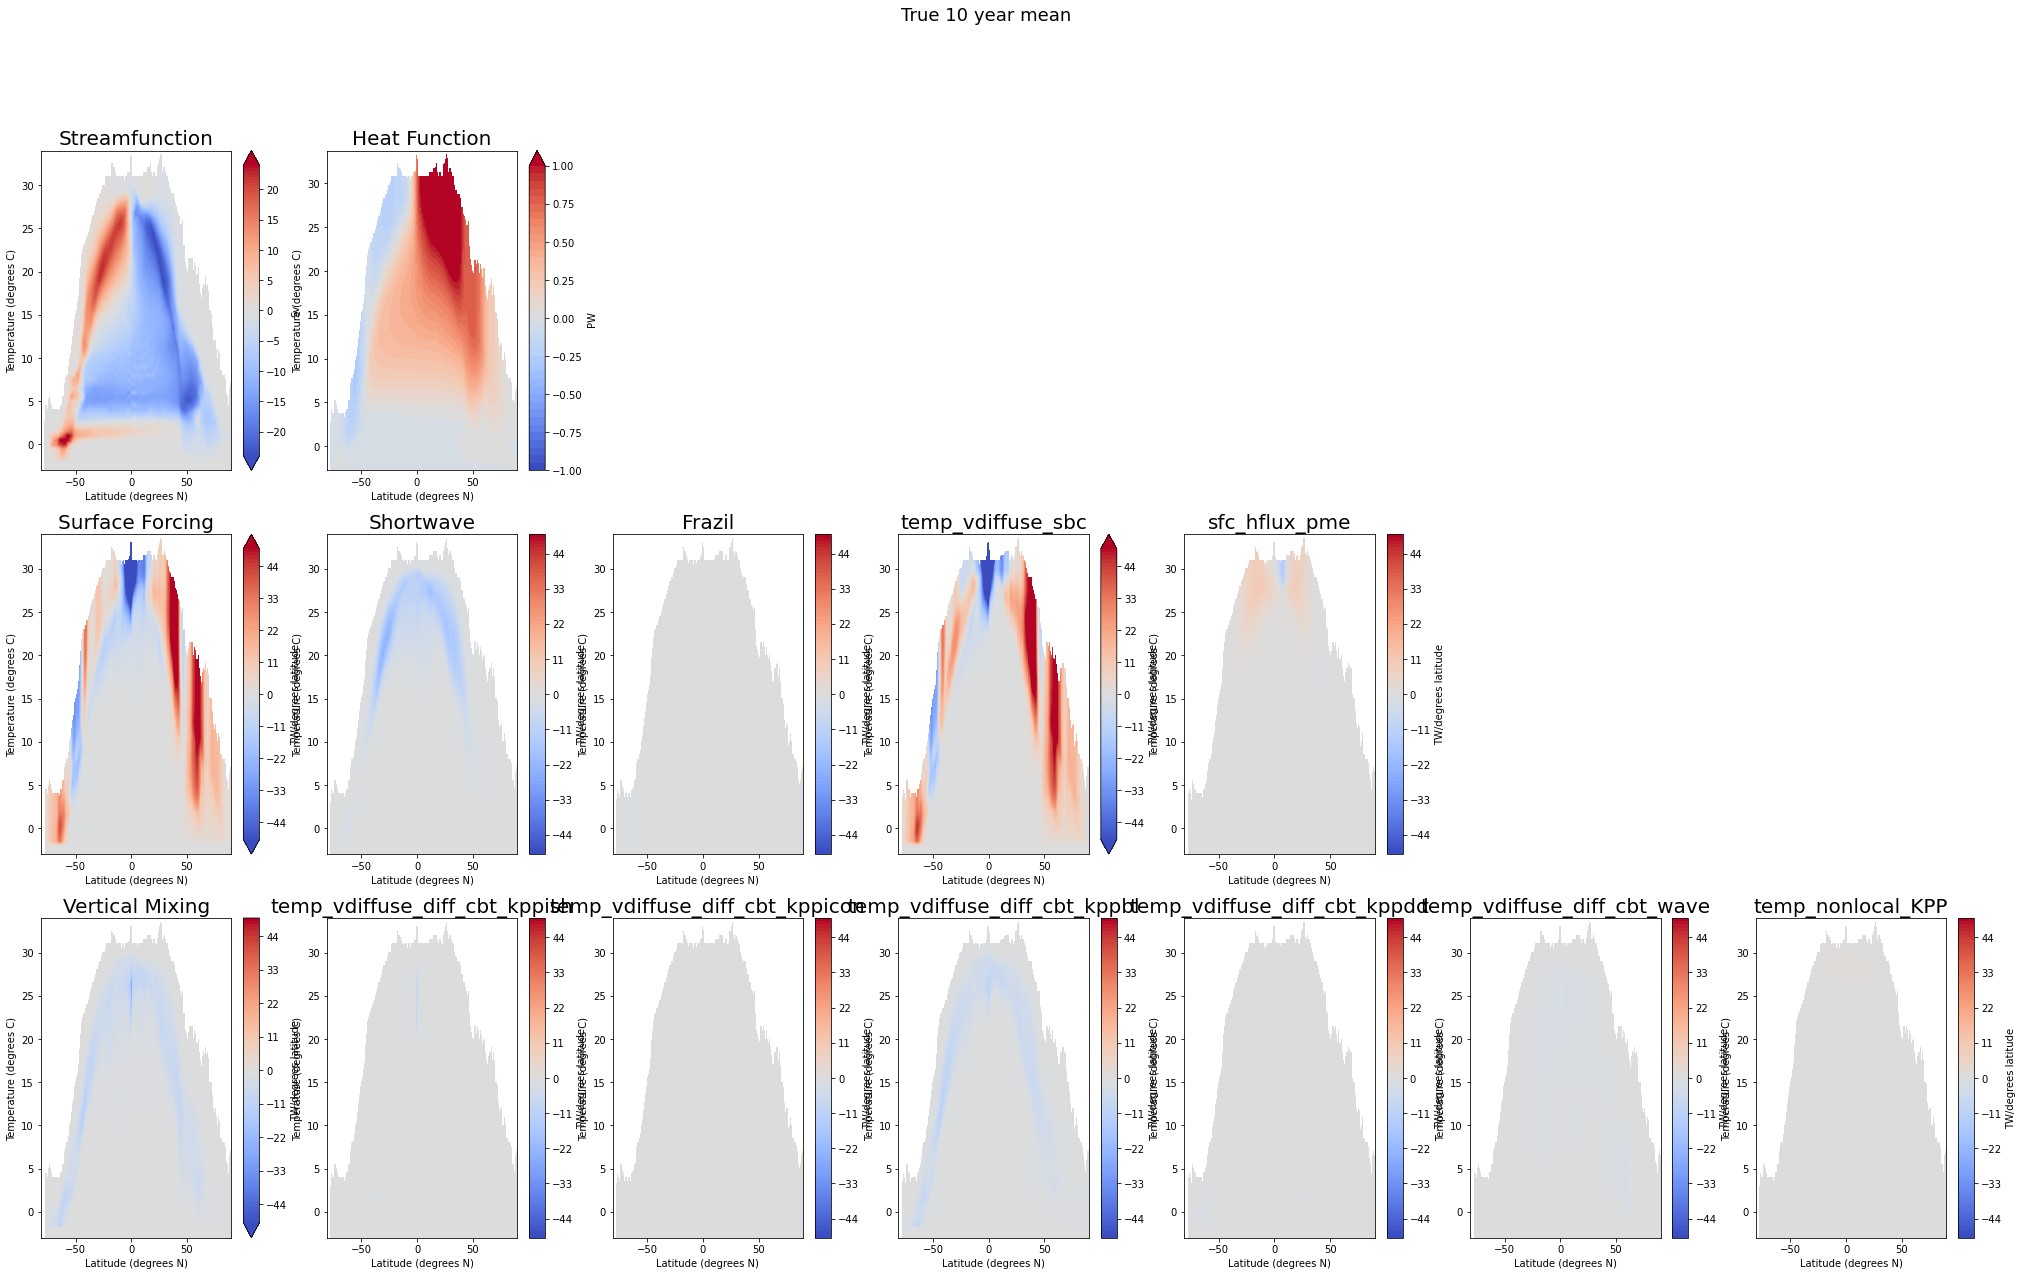

In [9]:
DataSet = True_10year_means
# masking:
maskPsi = 0*True_10year_means.Psi.sum('grid_xt_ocean').where(True_10year_means.Psi.sum('grid_xt_ocean')!=True_10year_means.Psi.sum('grid_xt_ocean').isel(neutralrho_edges=-1))+1.
maskHf = gridwm.interp(maskPsi,'T')
maskSF = gridwm.interp(maskPsi,'y',boundary="fill",fill_value=0.)
maskSF

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)/2
plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, MXcbar, 'True 10 year mean')

### Load 10 year mean (mean_tot)

In [57]:
%%time

Psi_mean_tot.load()
SF_mean_tot.load()
MX_mean_tot.load()

sw_heat_mean_tot.load()
frazil_3d_mean_tot.load()
temp_vdiffuse_sbc_mean_tot.load()
temp_vdiffuse_diff_cbt_kppish_mean_tot.load()
temp_vdiffuse_diff_cbt_kppicon_mean_tot.load()
temp_vdiffuse_diff_cbt_kppbl_mean_tot.load()
temp_vdiffuse_diff_cbt_kppdd_mean_tot.load()
temp_vdiffuse_diff_cbt_wave_mean_tot.load()

CPU times: user 28 s, sys: 17.3 s, total: 45.3 s
Wall time: 2min 48s


<xarray.DataArray 'concatenate-b61b02f6edb9a1e5d704a2d115b9a83c' (
                                                                  grid_yt_ocean: 1080,
                                                                  grid_xt_ocean: 1440,
                                                                  neutralrho_edges: 75)>
array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
...
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]]])
Coordinates:
  * grid_yt_ocean     (grid_yt_ocean) float64 -81.08 -80.97 ... 89.84 89.95
  * grid_xt_ocean     (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.5 -2.0 ... 33.5 34.0

In [58]:
ds = xr.Dataset({'Psi': Psi_mean_tot, 'SF': SF_mean_tot, 'MX': MX_mean_tot, 'sw_heat':sw_heat_mean_tot, 'frazil_3d':frazil_3d_mean_tot, 'temp_vdiffuse_sbc':temp_vdiffuse_sbc_mean_tot,'temp_vdiffuse_diff_cbt_kppish':temp_vdiffuse_diff_cbt_kppish_mean_tot,
                'temp_vdiffuse_diff_cbt_kppicon':temp_vdiffuse_diff_cbt_kppicon_mean_tot, 'temp_vdiffuse_diff_cbt_kppbl':temp_vdiffuse_diff_cbt_kppbl_mean_tot,
                'temp_vdiffuse_diff_cbt_kppdd':temp_vdiffuse_diff_cbt_kppdd_mean_tot,'temp_vdiffuse_diff_cbt_wave':temp_vdiffuse_diff_cbt_wave_mean_tot})
ds.to_netcdf('/scratch/e14/cy8964/temp/025deg_10yr_3d/Mean_10year_means.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'sw_heat': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'frazil_3d': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_sbc': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppish': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppicon': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppbl': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppdd': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_wave': {'shuffle': True, 'zlib': True, 'complevel': 5}})

In [10]:
Mean_10year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/Mean_10year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})

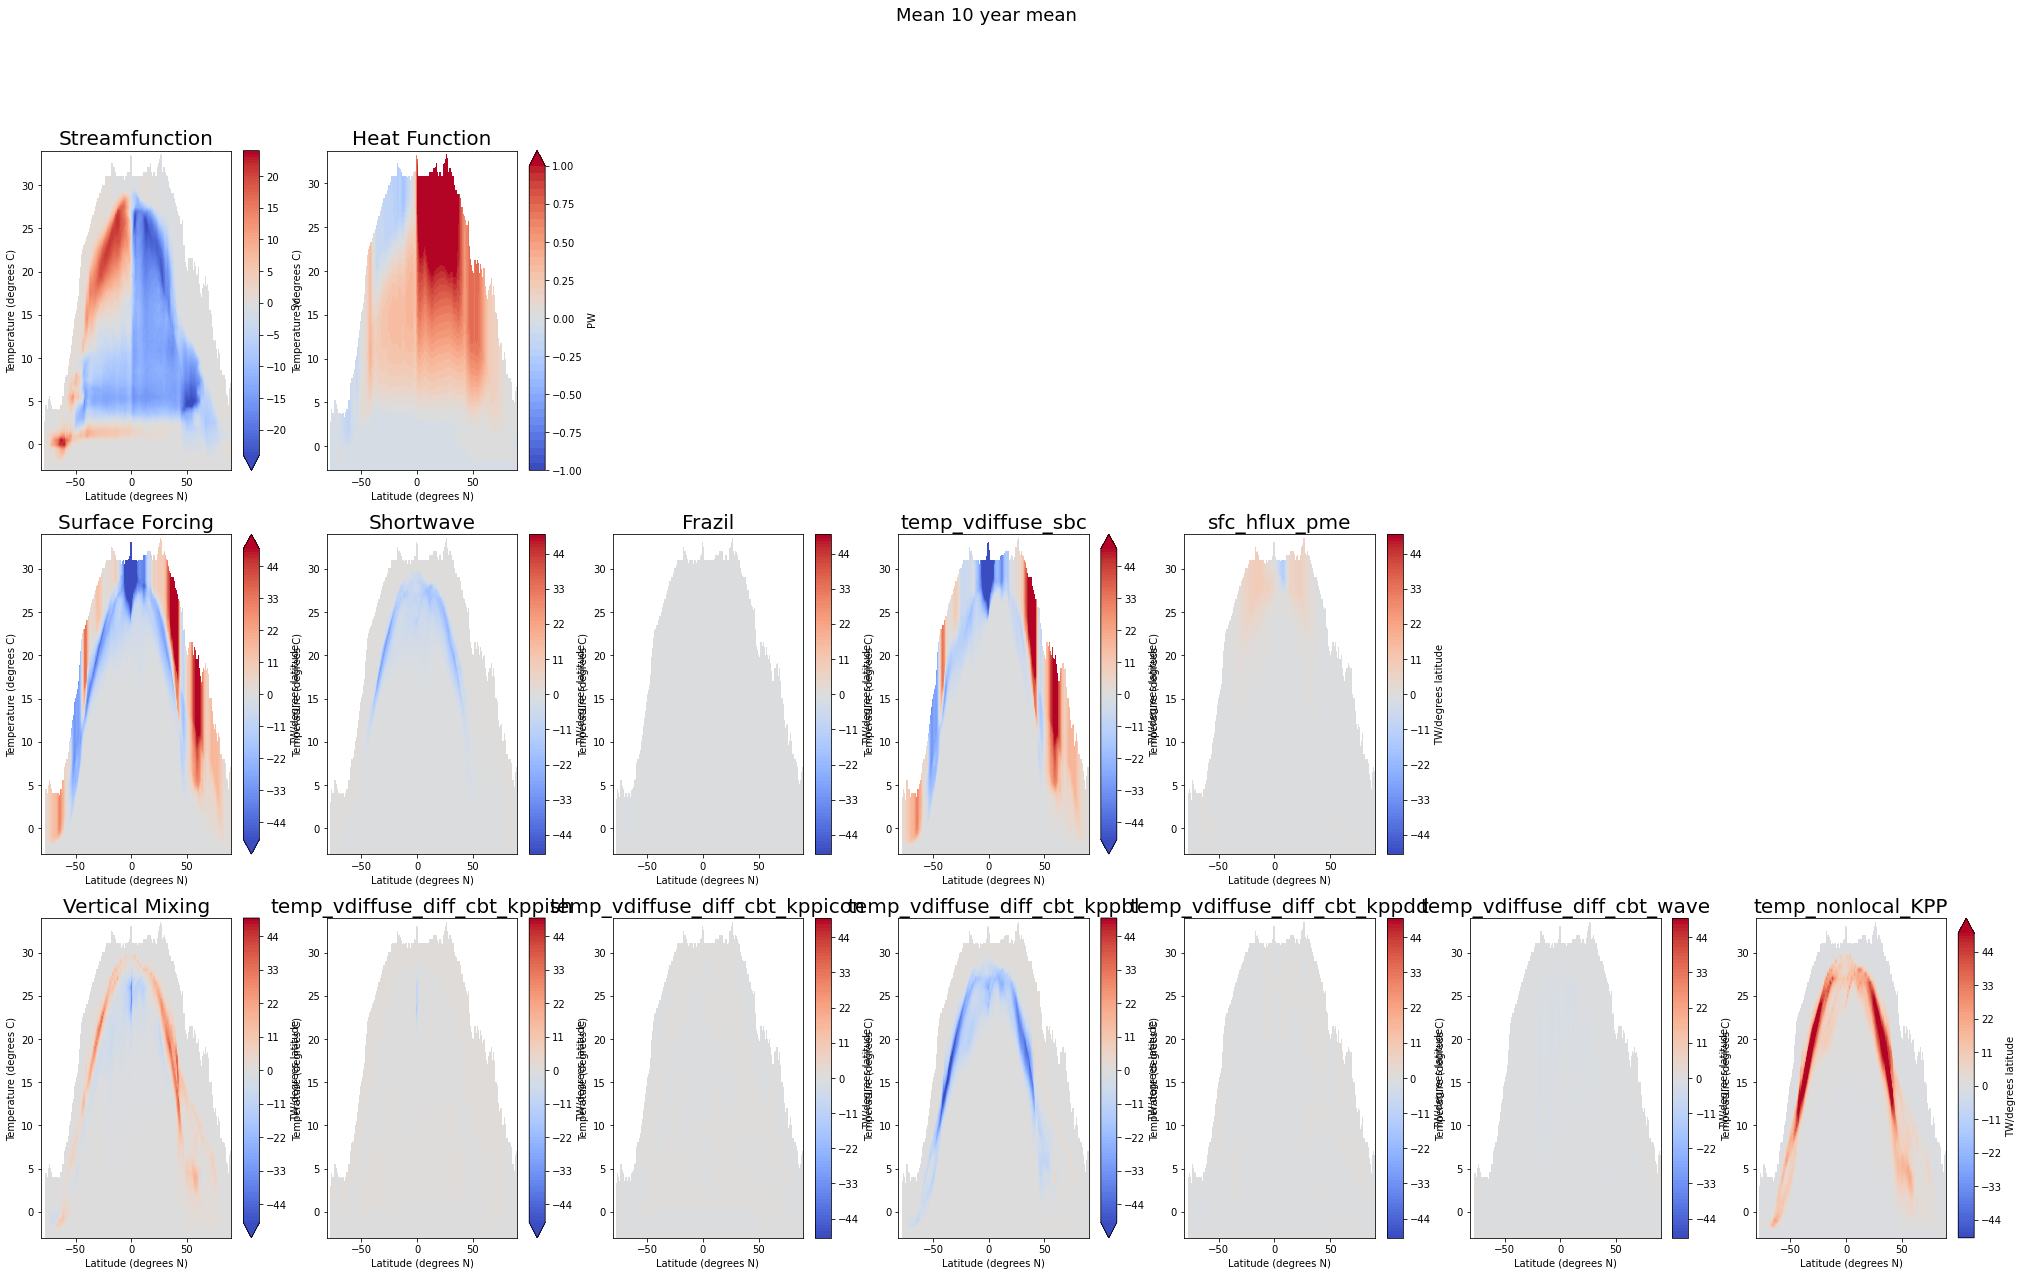

In [60]:
DataSet = Mean_10year_means

Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)


Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, MXcbar, 'Mean 10 year mean')

### Load seasonal climatology 2 month running mean

In [63]:
Psi_mean_sc = weighted_time_mean_2mo_filter(Psi_mean_sc)
SF_mean_sc = weighted_time_mean_2mo_filter(SF_mean_sc)
MX_mean_sc = weighted_time_mean_2mo_filter(MX_mean_sc)

sw_heat_mean_sc = weighted_time_mean_2mo_filter(sw_heat_mean_sc)
frazil_3d_mean_sc = weighted_time_mean_2mo_filter(frazil_3d_mean_sc)
temp_vdiffuse_sbc_mean_sc = weighted_time_mean_2mo_filter(temp_vdiffuse_sbc_mean_sc)

temp_vdiffuse_diff_cbt_kppish_mean_sc = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppish_mean_sc)
temp_vdiffuse_diff_cbt_kppicon_mean_sc = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppicon_mean_sc)
temp_vdiffuse_diff_cbt_kppbl_mean_sc = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppbl_mean_sc)
temp_vdiffuse_diff_cbt_kppdd_mean_sc = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_kppdd_mean_sc)
temp_vdiffuse_diff_cbt_wave_mean_sc = weighted_time_mean_2mo_filter(temp_vdiffuse_diff_cbt_wave_mean_sc)

In [64]:
temp_vdiffuse_sbc_mean_sc.load()

<xarray.DataArray (grid_yt_ocean: 1080, grid_xt_ocean: 1440,
                   neutralrho_edges: 75)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * grid_yt_ocean     (grid_yt_ocean) float64 -81.08 -80.97 ... 89.84 89.95
  * grid_xt_ocean     (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.5 -2.0 ... 33.5 34.0

In [62]:
%%time

Psi_mean_sc.load()
SF_mean_sc.load()
MX_mean_sc.load()

sw_heat_mean_sc.load()
frazil_3d_mean_sc.load()
temp_vdiffuse_sbc_mean_sc.load()

temp_vdiffuse_diff_cbt_kppish_mean_sc.load()
temp_vdiffuse_diff_cbt_kppicon_mean_sc.load()
temp_vdiffuse_diff_cbt_kppbl_mean_sc.load()
temp_vdiffuse_diff_cbt_kppdd_mean_sc.load()
temp_vdiffuse_diff_cbt_wave_mean_sc.load()

CPU times: user 4min 59s, sys: 27.4 s, total: 5min 26s
Wall time: 6min 23s


<xarray.DataArray (grid_yt_ocean: 1080, grid_xt_ocean: 1440,
                   neutralrho_edges: 75)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * grid_yt_ocean     (grid_yt_ocean) float64 -81.08 -80.97 ... 89.84 89.95
  * grid_xt_ocean     (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.5 -2.0 ... 33.5 34.0

In [63]:
ds = xr.Dataset({'Psi': Psi_mean_sc, 'SF': SF_mean_sc, 'MX': MX_mean_sc, 'sw_heat':sw_heat_mean_sc, 'frazil_3d':frazil_3d_mean_sc, 'temp_vdiffuse_sbc':temp_vdiffuse_sbc_mean_sc,'temp_vdiffuse_diff_cbt_kppish':temp_vdiffuse_diff_cbt_kppish_mean_sc,
                'temp_vdiffuse_diff_cbt_kppicon':temp_vdiffuse_diff_cbt_kppicon_mean_sc, 'temp_vdiffuse_diff_cbt_kppbl':temp_vdiffuse_diff_cbt_kppbl_mean_sc,
                'temp_vdiffuse_diff_cbt_kppdd':temp_vdiffuse_diff_cbt_kppdd_mean_sc,'temp_vdiffuse_diff_cbt_wave':temp_vdiffuse_diff_cbt_wave_mean_sc})
ds.to_netcdf('/scratch/e14/cy8964/temp/025deg_10yr_3d/sc_2mo_mean_10year_means.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'sw_heat': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'frazil_3d': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_sbc': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppish': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppicon': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppbl': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppdd': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_wave': {'shuffle': True, 'zlib': True, 'complevel': 5}})

In [10]:
sc_Twomo_mean_10year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/sc_2mo_mean_10year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})

2022-05-24 14:25:48,256 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 22.00 GiB -- Worker memory limit: 31.25 GiB
2022-05-24 14:25:48,320 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 22.05 GiB -- Worker memory limit: 31.25 GiB
2022-05-24 14:25:48,420 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 22.22 GiB -- Worker memory limit: 31.25 GiB
2022-05-24 14:25:48,520 - distributed

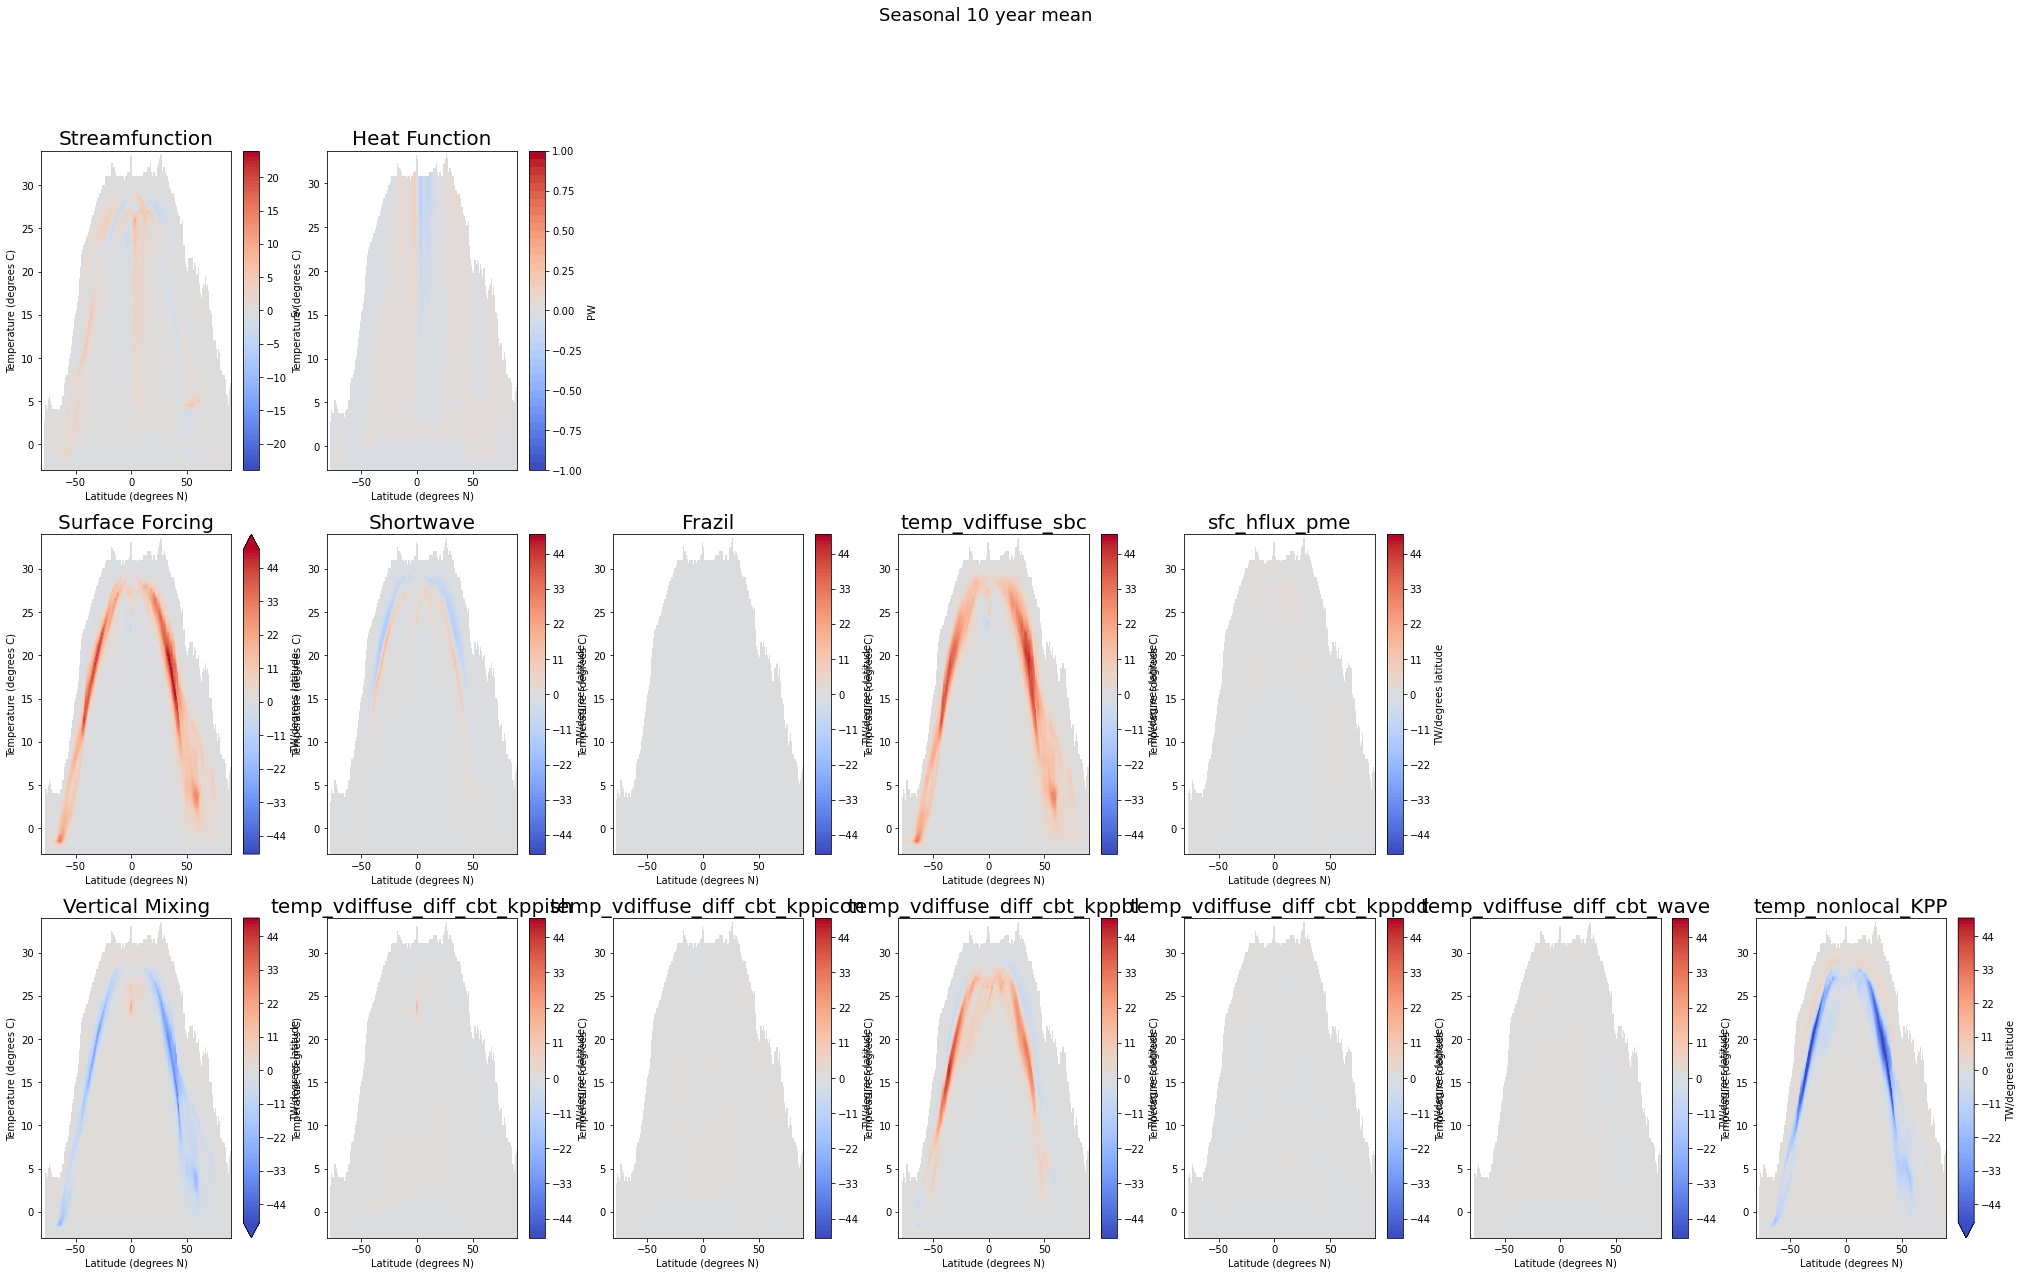

In [65]:
DataSet = sc_Twomo_mean_10year_means - Mean_10year_means

Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)

cmap = 'coolwarm'

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, MXcbar, 'Seasonal 10 year mean')

### Load 2 month running mean quantities

Used scripts as otherwise kernel died:

#### crashed when ran for all 10 years, so split into years and ran `g/data/e14/cy8964/analysis/scripts/save_2mo_quantities_xhistogram.py`

In [19]:
month_lengths = (sc_daylength + np.roll(sc_daylength,1))/2
month_lengths

array([31. , 29.5, 29.5, 30.5, 30.5, 30.5, 30.5, 31. , 30.5, 30.5, 30.5,
       30.5])

In [20]:
np.sum(month_lengths)

365.0

In [32]:
%%time

### example for one year and one variable

## j is the variable
## k is the year
run_count2 = 0
for j in np.array([5]):
    daily_array = [Psi_mean_2mo, SF_mean_2mo, MX_mean_2mo, sw_heat_mean_2mo, frazil_3d_mean_2mo, \
                   temp_vdiffuse_sbc_mean_2mo, temp_vdiffuse_diff_cbt_kppish_mean_2mo , \
                   temp_vdiffuse_diff_cbt_kppicon_mean_2mo, temp_vdiffuse_diff_cbt_kppbl_mean_2mo, \
                   temp_vdiffuse_diff_cbt_kppdd_mean_2mo, temp_vdiffuse_diff_cbt_wave_mean_2mo][j]
    daily_array_name = ['Psi_mean_2mo', 'SF_2mo', 'MX_2mo', 'sw_heat_2mo', 'frazil_3d_2mo', \
                        'temp_vdiffuse_sbc_2mo','temp_vdiffuse_diff_cbt_kppish_2mo', \
                        'temp_vdiffuse_diff_cbt_kppicon_2mo', 'temp_vdiffuse_diff_cbt_kppbl_2mo', \
                        'temp_vdiffuse_diff_cbt_kppdd_2mo', 'temp_vdiffuse_diff_cbt_wave_2mo'][j]
    
    k = run_count2
    daily_array = daily_array.isel(time = np.arange(k*12,k*12+12))
    daily_array_timemean = xr.zeros_like(daily_array.isel(time=0))
    print(daily_array.time.values)
    nt = len(daily_array.time.values)
    for i in range(nt):
        print('Doing time step ' + str(i+1) + ' of ' + str(nt))
        daily_array_t = daily_array.isel(time=i);
        daily_array_t.load()
        daily_array_timemean += daily_array_t*month_lengths[i]
    daily_array_timemean = daily_array_timemean/365
    daily_array_timemean.load()
    # ds = xr.Dataset({daily_array_name: daily_array_timemean})
    # ds.to_netcdf('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_'+daily_array_name+'_yr'+str(k)+'.nc', 
    #              encoding={daily_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})
temp_vdiffuse_sbc_mean_2mo_year0_weighted = daily_array_timemean

[cftime.DatetimeNoLeap(2081, 1, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 2, 15, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 3, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 4, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 5, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 6, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 7, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 8, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 9, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 10, 16, 12, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 11, 16, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2081, 12, 16, 12, 0, 0, 0, has_year_zero=True)]
Doing time step 1 of 12
Doing time step 2 of 12
Doing time step 3 of 12
Doing time step 4 of 12
Doing time step 5 of 12
Doing time step 6 of 12
Doing time step 7 of 12
Doing

Combine all 110 files (11 variables x 10 years) into 11 files, one for each variable:

0
1
2
3
4
5
6
7
8
9


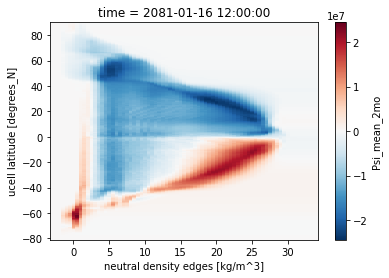

0
1
2
3
4
5
6
7
8
9


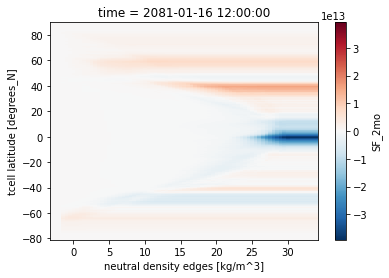

0
1
2
3
4
5
6
7
8
9


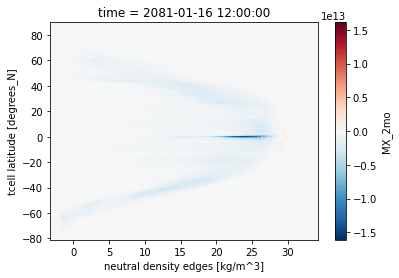

0
1
2
3
4
5
6
7
8
9


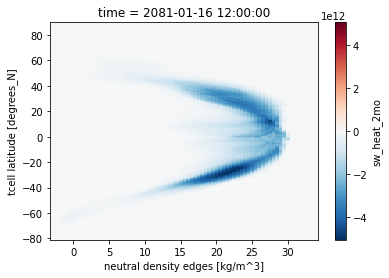

0
1
2
3
4
5
6
7
8
9


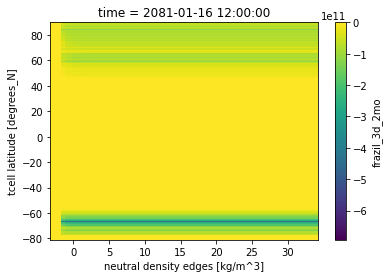

0
1
2
3
4
5
6
7
8
9


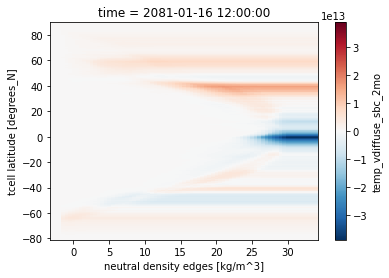

0
1
2
3
4
5
6
7
8
9


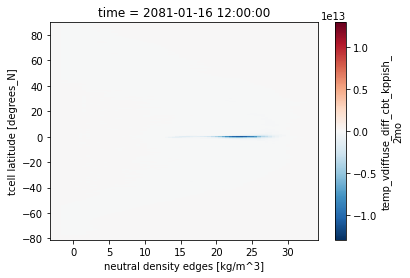

0
1
2
3
4
5
6
7
8
9


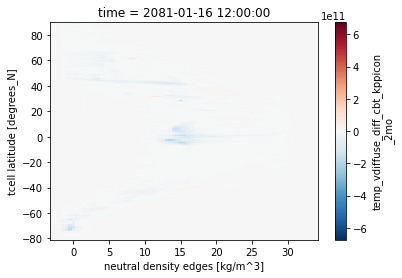

0
1
2
3
4
5
6
7
8
9


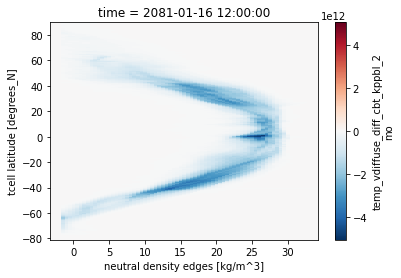

0
1
2
3
4
5
6
7
8
9


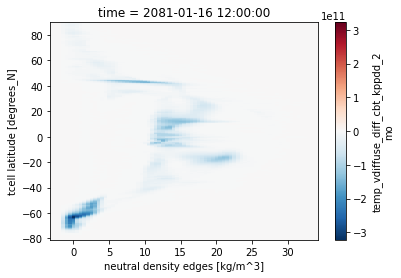

0
1
2
3
4
5
6
7
8
9


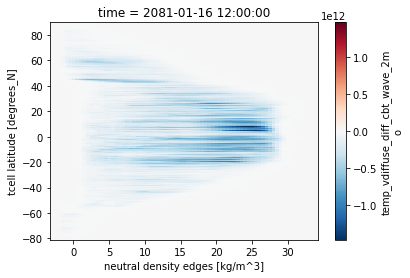

CPU times: user 13min 31s, sys: 2min 3s, total: 15min 35s
Wall time: 14min 29s


In [44]:
%%time
for j in np.arange(0,11):
    daily_array_name = ['Psi_mean_2mo', 'SF_2mo', 'MX_2mo', 'sw_heat_2mo', 'frazil_3d_2mo', \
                        'temp_vdiffuse_sbc_2mo','temp_vdiffuse_diff_cbt_kppish_2mo', \
                        'temp_vdiffuse_diff_cbt_kppicon_2mo', 'temp_vdiffuse_diff_cbt_kppbl_2mo', \
                        'temp_vdiffuse_diff_cbt_kppdd_2mo', 'temp_vdiffuse_diff_cbt_wave_2mo'][j]
    mo = '0'
    save_dir = '/scratch/e14/cy8964/temp/025deg_10yr_3d/'
    term1 = xr.open_dataarray(save_dir+'2mo_mean_10year_means_'+daily_array_name+'_yr'+mo+'.nc')#.daily_array_name
    term1  = xr.zeros_like(term1)
    term1  = term1.expand_dims({"yr":np.arange(10)}).copy()
    for k in np.arange(10):
        print(k)
        year = str(k)
        term1_k = xr.open_dataarray(save_dir+'2mo_mean_10year_means_'+daily_array_name+'_yr'+str(k)+'.nc')
        #term1_k.sum('grid_xt_ocean').plot()
        #plt.show()#.daily_array_name
        term1[k,:,:,:] = term1_k

    term1 = term1.sum('yr')/10
    term1.load()
    term1.sum('grid_xt_ocean').plot()
    plt.show()
    ds = xr.Dataset({daily_array_name: term1})
    ds.to_netcdf('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_'+daily_array_name+'.nc', 
                 encoding={daily_array_name: {'shuffle': True, 'zlib': True, 'complevel': 5}})

    

In [155]:
# load from PBS script output
Psi_mean_2mo = xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_Psi_mean_2mo.nc').Psi_mean_2mo
SF_2mo = xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_SF_2mo.nc').SF_2mo
MX_2mo = xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_MX_2mo.nc').MX_2mo
sw_heat_2mo    = xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_sw_heat_2mo.nc').sw_heat_2mo
frazil_3d_2mo    = xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_frazil_3d_2mo.nc').frazil_3d_2mo
temp_vdiffuse_sbc_2mo    = xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_temp_vdiffuse_sbc_2mo.nc').temp_vdiffuse_sbc_2mo
temp_vdiffuse_diff_cbt_kppish_2mo = xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_temp_vdiffuse_diff_cbt_kppish_2mo.nc').temp_vdiffuse_diff_cbt_kppish_2mo 
temp_vdiffuse_diff_cbt_kppicon_2mo= xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_temp_vdiffuse_diff_cbt_kppicon_2mo.nc').temp_vdiffuse_diff_cbt_kppicon_2mo
temp_vdiffuse_diff_cbt_kppbl_2mo= xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_temp_vdiffuse_diff_cbt_kppbl_2mo.nc').temp_vdiffuse_diff_cbt_kppbl_2mo
temp_vdiffuse_diff_cbt_kppdd_2mo= xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_temp_vdiffuse_diff_cbt_kppdd_2mo.nc').temp_vdiffuse_diff_cbt_kppdd_2mo
temp_vdiffuse_diff_cbt_wave_2mo= xr.open_dataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means_temp_vdiffuse_diff_cbt_wave_2mo.nc').temp_vdiffuse_diff_cbt_wave_2mo


In [156]:
# save to array
ds = xr.Dataset({'Psi': Psi_mean_2mo, 'SF': SF_2mo, 'MX': MX_2mo, 'sw_heat':sw_heat_2mo, 'frazil_3d':frazil_3d_2mo, 'temp_vdiffuse_sbc':temp_vdiffuse_sbc_2mo,'temp_vdiffuse_diff_cbt_kppish':temp_vdiffuse_diff_cbt_kppish_2mo,
                'temp_vdiffuse_diff_cbt_kppicon':temp_vdiffuse_diff_cbt_kppicon_2mo, 'temp_vdiffuse_diff_cbt_kppbl':temp_vdiffuse_diff_cbt_kppbl_2mo,
                'temp_vdiffuse_diff_cbt_kppdd':temp_vdiffuse_diff_cbt_kppdd_2mo,'temp_vdiffuse_diff_cbt_wave':temp_vdiffuse_diff_cbt_wave_2mo})
ds.to_netcdf('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means.nc', 
         encoding={'Psi': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'MX': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'sw_heat': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'frazil_3d': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_sbc': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'SF': {'shuffle': True, 'zlib': True, 'complevel': 5},                   
                  'temp_vdiffuse_diff_cbt_kppish': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppicon': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppbl': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_kppdd': {'shuffle': True, 'zlib': True, 'complevel': 5},
                  'temp_vdiffuse_diff_cbt_wave': {'shuffle': True, 'zlib': True, 'complevel': 5}})

In [11]:
Twomo_mean_10year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_10yr_3d/2mo_mean_10year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})


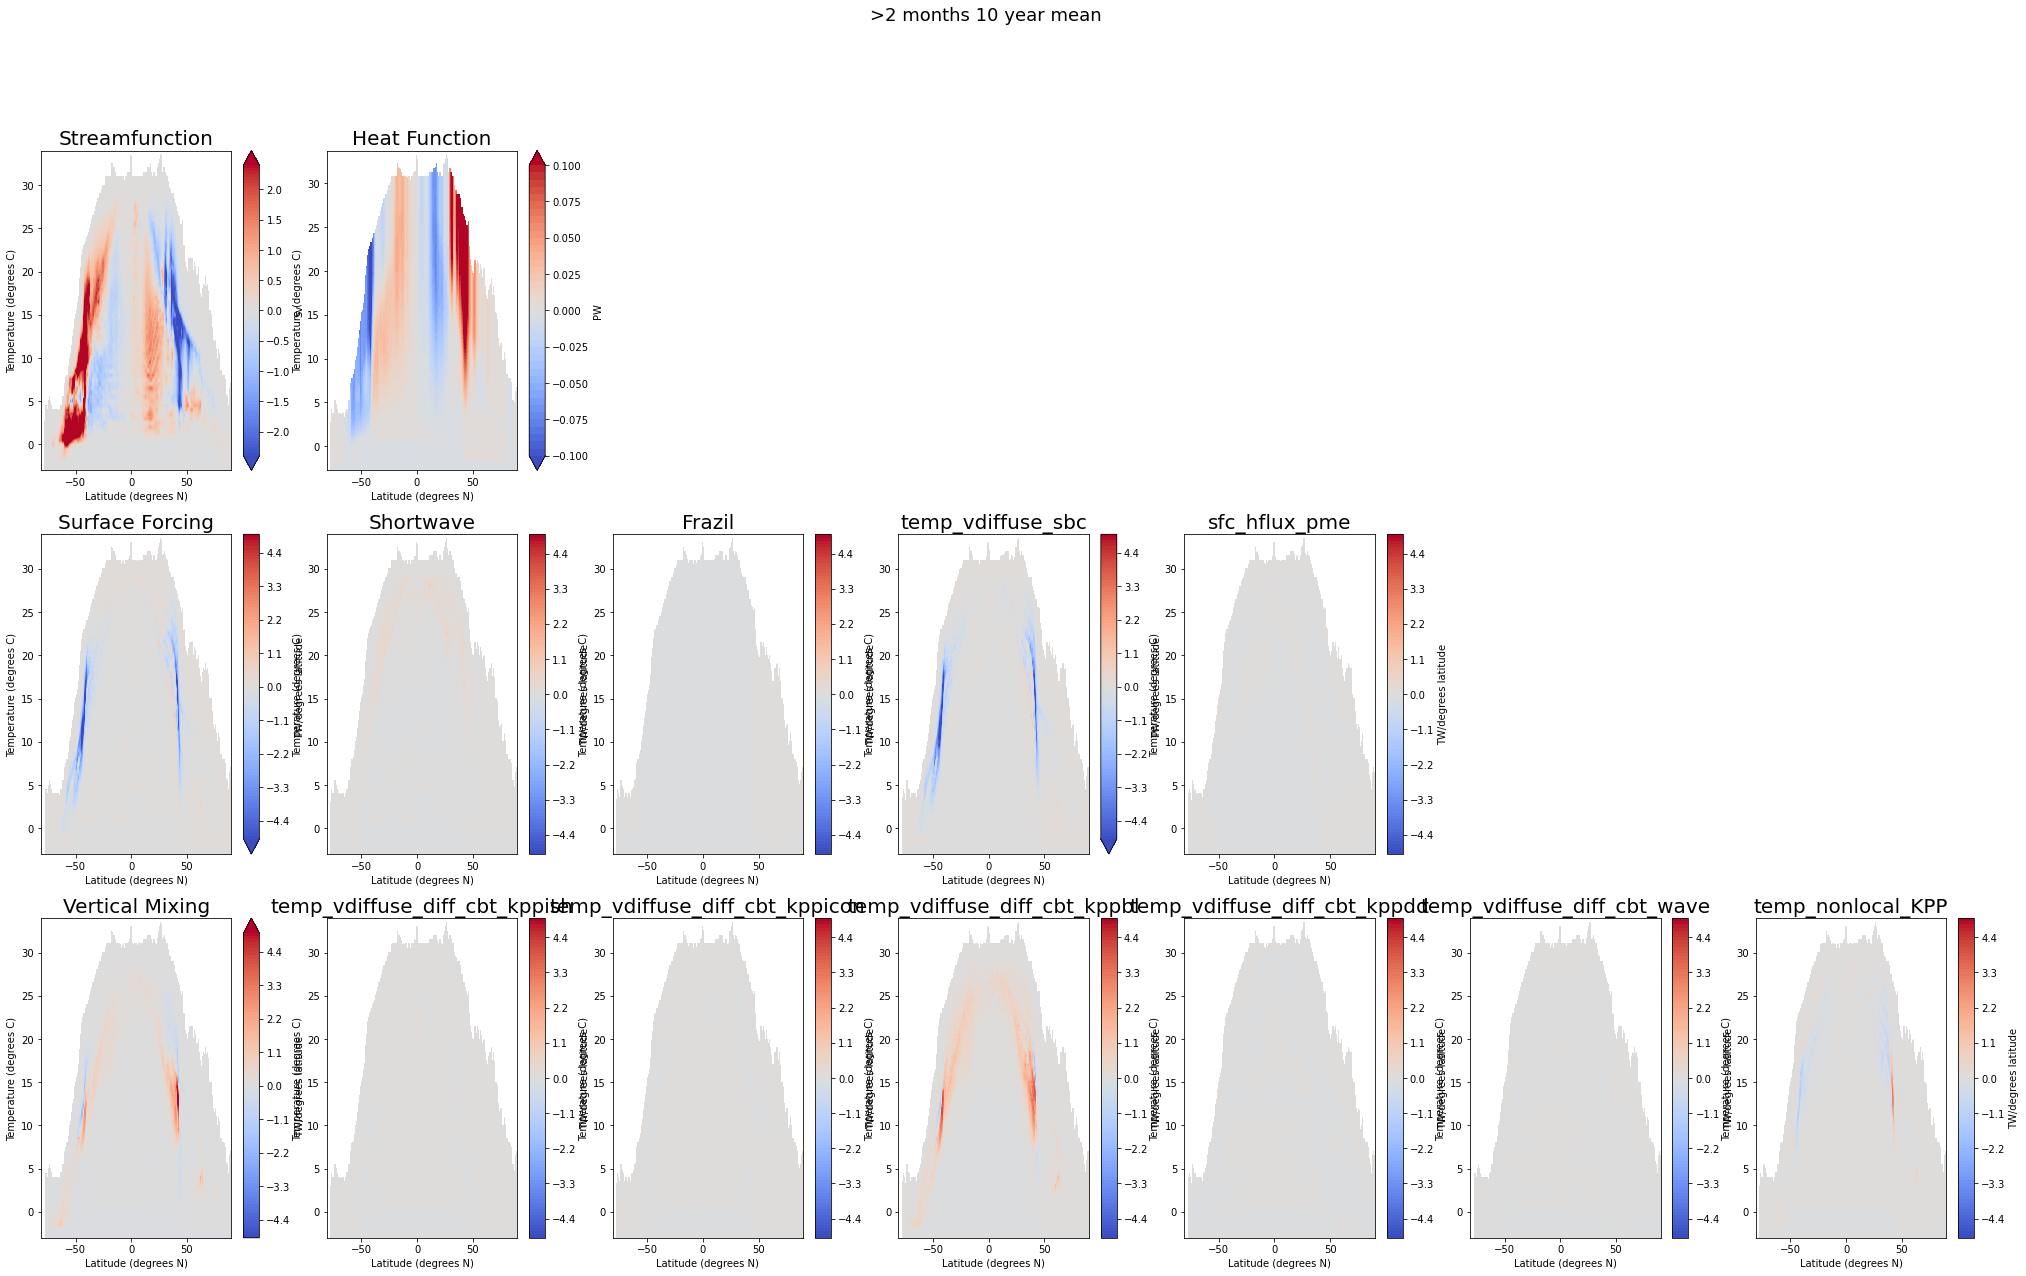

In [12]:
DataSet = Twomo_mean_10year_means - sc_Twomo_mean_10year_means

Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

Psicbar = np.arange(-24.,24.5,0.5)/10
Hfcbar = np.arange(-1.,1.05,0.05)/10
SFcbar = np.arange(-50.,51.,1.)/10
MXcbar = np.arange(-25.,25.,1.)/10

cmap = 'coolwarm'

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, MXcbar, '>2 months 10 year mean')